# Swedish Property Market Analysis Notebook

This notebook contains an extensive analysis of the Swedish property market that allows for better purchase and sales decisions.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3
import ipywidgets as widgets
import numpy as np

In [2]:
con = sqlite3.connect('data/propertymarket.db')
closed_listings = pd.read_sql_query("select * from closed_listings", con)
closed_listings.shape

(2544, 23)

## Distribution of prices

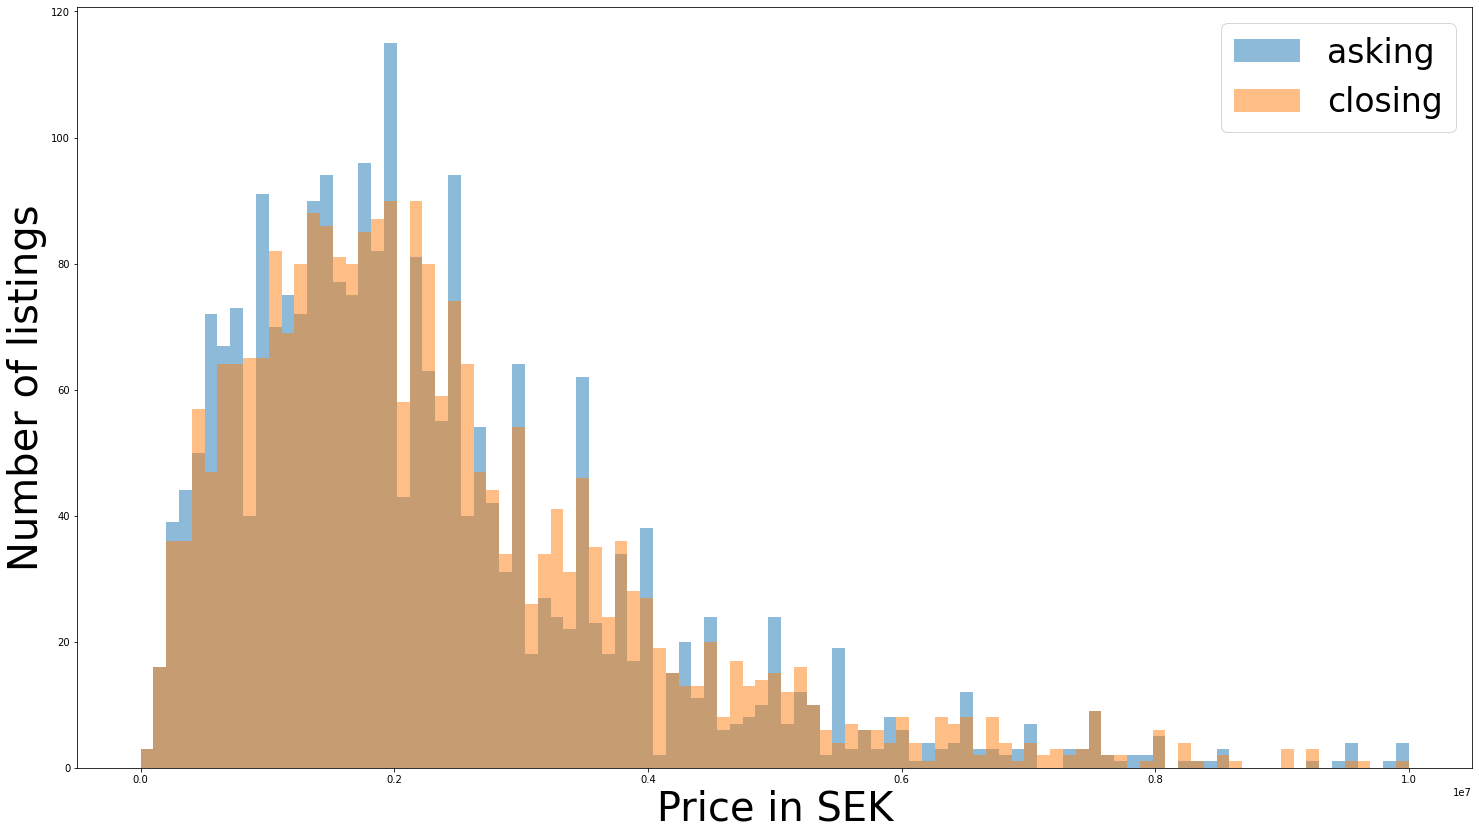

In [3]:
property_types = list(set(closed_listings['listing_type']))
widgets.SelectMultiple(
    options=property_types,
    value=['Villa'],
    #rows=10,
    description='Property Type',
    disabled=False
)

max_asking_price = closed_listings['asking_price'].max()
max_closing_price = closed_listings['closing_price'].max()
max_price = 1e7#np.max([max_closing_price, max_asking_price])
bins = np.linspace(0,max_price,100)

plt.figure(figsize=(25,14))
plt.hist(closed_listings['asking_price'], bins, alpha=0.5, label='asking')
plt.hist(closed_listings['closing_price'], bins, alpha=0.5, label='closing')
plt.xlabel("Price in SEK", fontsize=40)
plt.ylabel("Number of listings", fontsize=40)
plt.legend(loc='upper right', prop={'size': 33})

plt.show()